<h2 align="center"> Task 2: Prediction Using Unsupervised ML </h2>
<h4 align="center"> Preet Kothari </h4>
<h3 align="center"> The Sparks Fundation - GRIP </h3>

* Problem: Predict the optimum number of clusters and represent them visually based on the given 'Iris' dataset.
* The dataset can be found at: https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
# Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model
from sklearn.cluster import KMeans

# To ignore warnings generated by the current version of seaborn 
import warnings                  
warnings.filterwarnings("ignore")

### Data Extraction and Preprocessing
Pandas provides the function **read_csv** which can be used to read csv files and import the data from both the local memory and any link to csv over the internet.

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Generating the descriptive statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# Checking for any null values
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data visualisation
Plotting our data points on 2-D graph gives us a basic idea of what trend the data follows. With the help of visualizations we eyeball our dataset and see if we can manually find any relationship between the data.

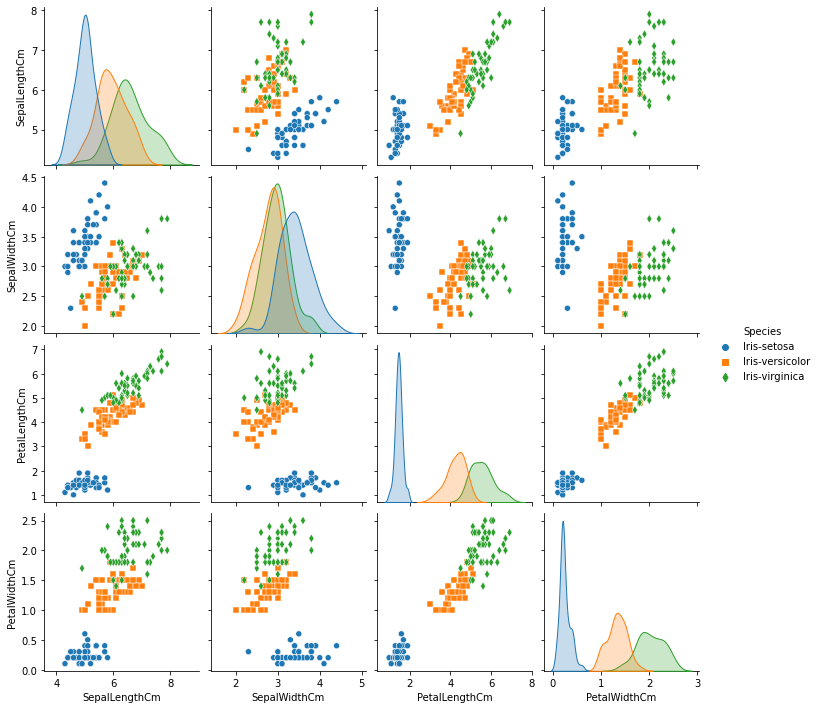

In [5]:
# Pairplot to visualize scatter plots between all columns except Id 
sns.pairplot(iris.iloc[:,1:], hue="Species", markers=["o","s","d"])
plt.show()

From above pairplot we can observe that **Iris-setosa** makes a distinct cluster in every plot while the other two species are often overlapping.

In [6]:
def bxplt(y_value):
    sns.boxplot(x='Species',y=y_value,data=iris)

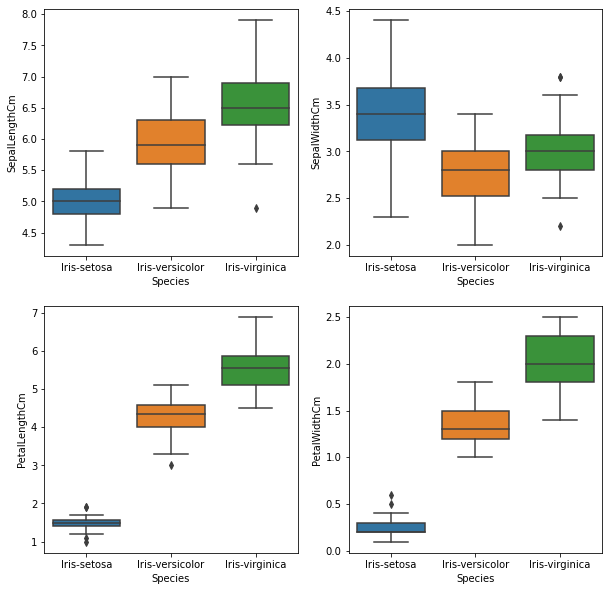

In [7]:
# Boxplot to visualize how the values in the data are spread out
plt.figure(figsize=(10,10))

plt.subplot(221)
bxplt(iris.columns[1])
  
plt.subplot(222)
bxplt(iris.columns[2])
  
plt.subplot(223)
bxplt(iris.columns[3])
  
plt.subplot(224)
bxplt(iris.columns[4])
  
plt.show()

From the above Boxplots we can see that nearly all the data is between the **inter-quartile range** with a few outliers.

### Data Preparation
The next step is to divide the data into "features" (inputs) and "labels" (outputs) and removing the unwanted data. 

In [8]:
X = iris.iloc[:,1:-1]
Y = iris.iloc[:,-1]
print(X.shape, Y.shape)

(150, 4) (150,)


### Optimum Number of Clusters for KMeans using Elbow Method
In cluster analysis, the **Elbow Method** is a heuristic used in determining the number of clusters in a data set. By plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve we get the optimum number of clusters to use for the model.

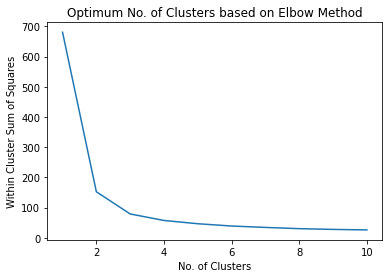

In [9]:
wcss = [] # List to store the Within Cluster Sum of Squares(WCSS)
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    random_state = 1, max_iter = 300, n_init = 10)
    # init = 'k-means++' is used to avoid the random initialization trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # 'inertia_' attribute store the wcss of the model

plt.plot(range(1, 11), wcss)
plt.title('Optimum No. of Clusters based on Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In the above plot, the optimum clusters is where the elbow occurs. This is where Within Cluster Sum of Squares (WCSS) value doesn't decrease significantly with every iteration.
Now the elbow of the curve is at number of cluster equals to 3.

### KMeans Model
Building the KMeans model with n_clusters = 3

In [10]:
model = KMeans(n_clusters = 3, init = 'k-means++',
               random_state = 1, max_iter = 300, n_init = 10)
Y_pred = model.fit_predict(X)

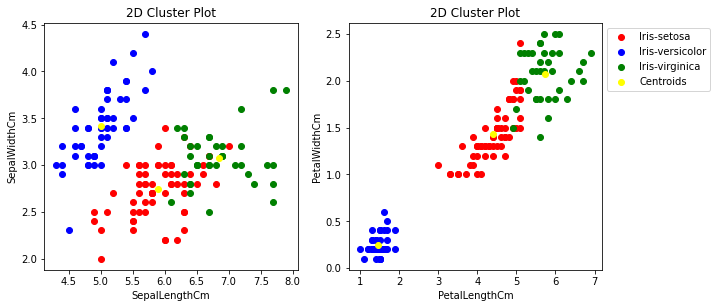

In [12]:
# Plotting scatter plots to visualize centroids in clusters based on 2 columns
plt.figure(figsize=(10,10))

# Visualizing clusters on the first two columns
plt.subplot(221)
plt.scatter(X.iloc[Y_pred == 0,0], X.iloc[Y_pred == 0,1], c = 'red', label = 'Iris-setosa')
plt.scatter(X.iloc[Y_pred == 1,0], X.iloc[Y_pred == 1,1], c = 'blue', label = 'Iris-versicolor')
plt.scatter(X.iloc[Y_pred == 2,0], X.iloc[Y_pred == 2,1], c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('2D Cluster Plot')

# Visualizing clusters on the last two column
plt.subplot(222)
plt.scatter(X.iloc[Y_pred == 0,2], X.iloc[Y_pred == 0,3], c = 'red', label = 'Iris-setosa')
plt.scatter(X.iloc[Y_pred == 1,2], X.iloc[Y_pred == 1,3], c = 'blue', label = 'Iris-versicolor')
plt.scatter(X.iloc[Y_pred == 2,2], X.iloc[Y_pred == 2,3], c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3], c = 'yellow', label = 'Centroids')
plt.xlabel(X.columns[2])
plt.ylabel(X.columns[3])
plt.title('2D Cluster Plot')
plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()